<a href="https://colab.research.google.com/github/heungsikyu/data_analysis_study/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터 분석

## 1. Time Series width Pandas

*   DateTime Index 
     - time 또는 date 정보는 별개의 칼럼이기 보다 인덱스인 경우가 많다.
     - Panda에 내장된 기능들로 DateTime 인덱스를 생성하고 활용하는 방법을 안다. 
*   Time Resampling 
     - 시계열 데이터의 인덱스는 시(hours), 분(minutes)등 작은 단위 DateTime 인덳로 이뤄진 경우가 많다. 
     - 더 넓은 주기로 데이터를 집계 해야 하는 경우 Time Resampling이 vlfdy
     - groupby 를 사용함으로써 Time Resampling을 수행할 수는 있지만, 비즈니스 도메인에서 분기나 회계년도를 편리하게 처리할 방법은 안됨
     - Pandas 는 이런 경우에 활용 할 수 있는 frequency sampling 도구를 지원 
* Time Shifiting
     - 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이동시켜야 할 때 사용
     - Pandas는 이런 경우에도 매우 쉬운 방법 제공
* Rolling and Expanding
     - 매일 수집되는 데이터들에는 노이즈가 포함되기도 한다.
     - 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean(또는 moving average)을 사용하기도 한다. 
     - Pandas에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균(rolling mean)등을 구할 수 있다. 
     - 임의 시간 간격에 window를 만들고 그 안에서 mean같은 통계적 aggregation을 실행 하면된다.



### 볼린저 밴드(Bollinger Band)

### Datetime Index 만들기

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
from datetime import datetime

today = datetime(2021, 1, 16, 10, 20)
today

datetime.datetime(2021, 1, 16, 10, 20)

In [85]:
today.day

16

In [86]:
today.year

2021

In [97]:
dates = [datetime(2020,1,15), datetime(2020,1,16)]
dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2020-01-15', '2020-01-16'], dtype='datetime64[ns]', freq=None)

In [98]:
data = np.random.randn(2,2)
cols = ['A','B']

In [99]:
df = pd.DataFrame(data=data, index=dt_index, columns=cols)
df

,A,B
2020-01-15,2.792558,1.010789
2020-01-16,-1.236437,2.167115


In [100]:
df.index


DatetimeIndex(['2020-01-15', '2020-01-16'], dtype='datetime64[ns]', freq=None)

In [103]:
df.index.max()

Timestamp('2020-01-16 00:00:00')

In [104]:
df.index.min()

Timestamp('2020-01-15 00:00:00')

In [105]:
df.index.argmax()

1

In [106]:
df.index.argmin()

0

### RESAMPLING

In [139]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apple_stock_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6953 non-null   object 
 1   Open       6953 non-null   float64
 2   High       6953 non-null   float64
 3   Low        6953 non-null   float64
 4   Close      6953 non-null   float64
 5   Volume     6953 non-null   int64  
 6   Adj Close  6953 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 380.4+ KB


In [140]:
df['Date']= df['Date'].apply(pd.to_datetime)

In [133]:
df


,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-03-30,608.77,610.56,597.94,599.55,26050900,599.55
1,2012-03-29,612.78,616.56,607.23,609.86,21668300,609.86
2,2012-03-28,618.38,621.45,610.31,617.62,23385200,617.62
3,2012-03-27,606.18,616.28,606.06,614.48,21628200,614.48
4,2012-03-26,599.79,607.15,595.26,606.98,21259900,606.98
...,...,...,...,...,...,...,...
6948,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6949,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6950,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6951,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


In [141]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6953 non-null   datetime64[ns]
 1   Open       6953 non-null   float64       
 2   High       6953 non-null   float64       
 3   Low        6953 non-null   float64       
 4   Close      6953 non-null   float64       
 5   Volume     6953 non-null   int64         
 6   Adj Close  6953 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 380.4 KB


In [142]:
df.set_index('Date', inplace=True)

In [143]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,608.77,610.56,597.94,599.55,26050900,599.55
2012-03-29,612.78,616.56,607.23,609.86,21668300,609.86
2012-03-28,618.38,621.45,610.31,617.62,23385200,617.62
2012-03-27,606.18,616.28,606.06,614.48,21628200,614.48
2012-03-26,599.79,607.15,595.26,606.98,21259900,606.98
...,...,...,...,...,...,...
1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07


In [145]:
df['month'] = df.index.month

In [146]:
df

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012-03-30,608.77,610.56,597.94,599.55,26050900,599.55,3
2012-03-29,612.78,616.56,607.23,609.86,21668300,609.86,3
2012-03-28,618.38,621.45,610.31,617.62,23385200,617.62,3
2012-03-27,606.18,616.28,606.06,614.48,21628200,614.48,3
2012-03-26,599.79,607.15,595.26,606.98,21259900,606.98,3
...,...,...,...,...,...,...,...
1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14,9
1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98,9
1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07,9


In [147]:
df.groupby('month').agg(sum)

,Open,High,Low,Close,Volume,Adj Close
month,,,,,,
1,45028.13,45721.95,44236.53,44979.38,11625740200,32429.23
2,44070.74,44728.94,43483.81,44151.65,8140532000,32186.27
3,52676.21,53434.18,51937.94,52734.59,9015289300,39455.93
4,38514.35,39117.21,37879.05,38521.84,8312347600,26187.40
5,40330.27,40895.85,39637.45,40295.10,7465312700,27576.86
6,40436.32,40981.86,39761.35,40345.96,7828327800,28695.85
7,39040.28,39649.98,38402.61,39059.42,8093649500,28717.50
8,42418.29,43042.79,41794.72,42443.26,7444389000,31261.13
9,41066.13,41694.95,40416.83,41042.82,7813408300,30146.65


In [149]:
df.groupby(df.index.year).sum()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
1984,2064.17,2087.55,2040.42,2046.29,449431200,233.49,845
1985,5155.49,5210.10,5092.26,5109.00,1630563200,582.95,1649
1986,8194.16,8333.74,8059.23,8212.64,1909169600,937.09,1653
1987,13617.18,13924.31,13331.88,13634.09,2135843600,2253.24,1656
1988,10513.68,10673.25,10345.36,10509.64,1476341200,2419.87,1652
1989,10487.02,10659.72,10326.70,10498.26,1820737200,2440.51,1642
1990,9488.06,9669.57,9314.80,9503.36,1588632400,2233.01,1645
1991,13270.28,13516.68,13031.29,13281.37,2051108400,3154.70,1650
1992,13920.14,14122.93,13707.16,13920.06,1471985600,3335.19,1657


In [150]:
df.groupby([df.index.year, df.index.month]).sum()

Open      High       Low     Close     Volume  Adj Close  month
Date Date                                                                     
1984 9       431.70    437.33    425.70    427.82   76916800      48.83    144
     10      575.82    582.21    569.95    570.56  127866400      65.10    230
     11      515.45    520.44    507.95    508.96  120740800      58.06    231
     12      541.20    547.57    536.82    538.95  123907200      61.50    240
1985 1       649.44    656.83    641.08    643.57  227784000      73.43     22
...             ...       ...       ...       ...        ...        ...    ...
2011 11     8111.63   8166.47   8015.41   8081.12  319998300    8081.12    231
     12     8248.18   8308.96   8192.93   8251.54  224979000    8251.54    252
2012 1      8575.20   8620.17   8516.21   8571.56  244496500    8571.56     20
     2      9896.06  10016.98   9828.75   9951.42  405542900    9951.42     40
     3     12690.88  12805.42  12545.41  12705.17  555849800   12705.17     66

[331 rows x 7 columns]

#### RESAMPLING
**Timeseries Offset aliases 알것**
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

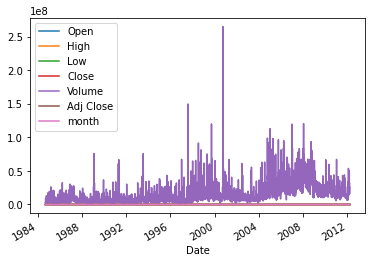

In [151]:
df.plot()

## 2.시계열 데이터 특성 

## 3. ETS 모델 
 Error, Trend, Seanonality 요소들을 활용하는데 각각을 더하거나 곱하여 Smoothing한다
 이것들을 가지고 시계열 데이터 모델링을 할수 있다. 

 

*   ETS Decompostition - Airline Passengers




In [12]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 6.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
data = [i+np.random.randint(10 ) for i in range(1, 100)]

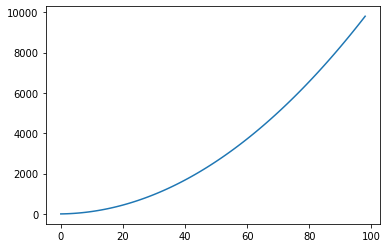

In [58]:
series = pd.Series(data)
series.plot()

## Additive Model

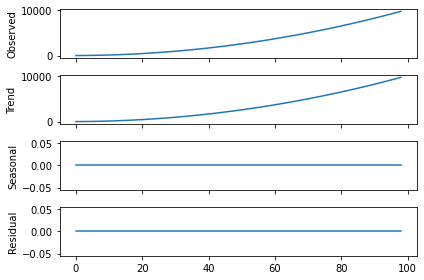

In [59]:
result = seasonal_decompose(series, model='additive', freq=1)
result.plot();

In [62]:
def plot_decompose(decomposeresult):
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
  decomposeresult.observed.plot(legend=False, ax=ax1)
  ax1.set_ylabel('Observerd')
  decomposeresult.trend.plot(legend=False, ax=ax2)
  ax2.set_ylabel('Trend')
  decomposeresult.seasonal.plot(legend=False, ax=ax3)
  ax3.set_ylabel('Seansonal')
  decomposeresult.resid.plot(legend=False, ax=ax4)
  ax4.set_ylabel('Resid')

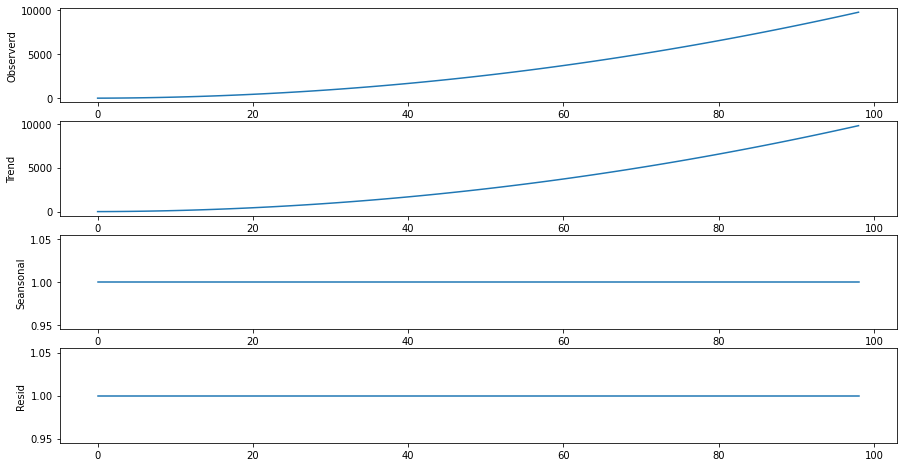

In [67]:
plot_decompose(result)

 ## multiplicative Model
  y_t = Level * Error *  Trend * Seasonality
  
  log(y_t) = Level + Error + Trend +Seansonality

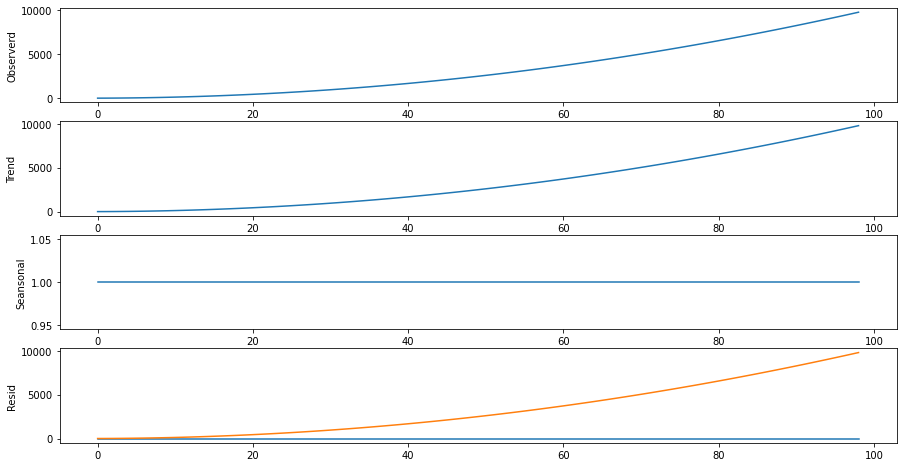

In [76]:
data = [i**2 for i in range(1,100)]
series1 = pd.Series(data)

result1 = seasonal_decompose(series1, model='muliplicative', freq=1)

plot_decompose(result1)

series.plot()

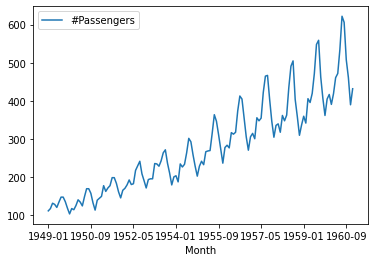

In [77]:
airline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv', index_col='Month' )
airline.plot()

In [78]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


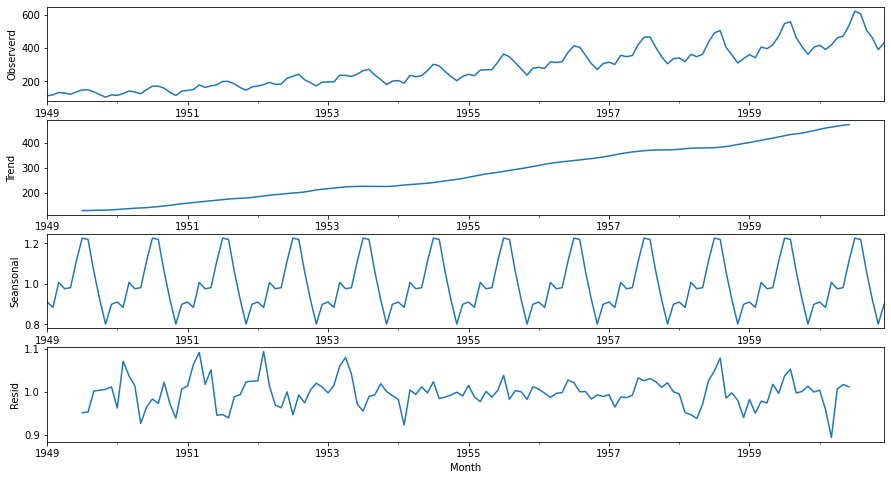

In [79]:
result = seasonal_decompose(airline['#Passengers'], model='multiplicative')
plot_decompose(result)